# Build a DecisionTreeClassifier for the Iris dataset

## Import libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn import tree
import graphviz

## Load the iris data into memory and display information about the dimensionality and size

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Objects: {df.shape[0]}")
df['target'] = data.target
print(f"Shape: {df.shape}")
print(df.head())

Number of Features: 4
Number of Objects: 150
Shape: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


## Assign labels for the loaded data and display the number of classes

In [3]:
labels = data.target_names
feature_names = data.feature_names
print(f"Number of Classes: {len(labels)} \n {labels}")
print(f"Number of Features: {len(feature_names)} \n {feature_names}")

Number of Classes: 3 
 ['setosa' 'versicolor' 'virginica']
Number of Features: 4 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Split the data into training (70%) and test data (30%)

In [4]:
X = df[feature_names]
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size=0.7, test_size=0.3)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_train.head(3))
print(X_test.head(3))

(105, 4) (105,)
(45, 4) (45,)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
60                 5.0               2.0                3.5               1.0
116                6.5               3.0                5.5               1.8
144                6.7               3.3                5.7               2.5
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2


## Standardize the data using StandardScaler



In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform for test data
print(X_train[0:3, :])

[[-1.02366372 -2.37846268 -0.18295039 -0.29318114]
 [ 0.69517462 -0.10190314  0.93066067  0.7372463 ]
 [ 0.92435306  0.58106472  1.04202177  1.63887031]]


## Create and train the model with training data


In [6]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Test and evaluate the model accuracy, showing confusion matrix, accuracy, and f-score

In [7]:
# Test for 10 instances
print('Input: ' + str(X_test[0:9]))
print('Output: ' + str(clf.predict(X_test[0:9, :])))
print('True value: ' + str(Y_test[0:9].values))

Input: [[-0.10694994 -0.55721505  0.70793846  1.51006688]
 [ 0.1222285  -1.92315077  0.09545238 -0.29318114]
 [-0.45071761  2.6299683  -1.35224199 -1.32360858]
 [ 1.6118884  -0.32955909  1.37610509  0.7372463 ]
 [-1.02366372  0.80872067 -1.29656144 -1.32360858]
 [ 0.46599617  0.58106472  1.20906343  1.63887031]
 [-1.02366372  1.03637663 -1.40792255 -1.19480515]
 [ 0.92435306  0.12575281  0.48521625  0.35083601]
 [ 1.03894229 -0.55721505  0.5408968   0.22203258]]
Output: [2 1 0 2 0 2 0 1 1]
True value: [2 1 0 2 0 2 0 1 1]


In [8]:
Y_predict = clf.predict(X_test)
Y_true = Y_test.values
print(confusion_matrix(Y_true, Y_predict))

[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]


In [9]:
accuracy = accuracy_score(Y_true, Y_predict)
f1 = f1_score(Y_true, Y_predict, average=None)
print(accuracy, f1)


0.9111111111111111 [1.         0.89473684 0.8       ]


## Visualize the decision tree


|--- feature_3 <= -0.62
|   |--- class: 0
|--- feature_3 >  -0.62
|   |--- feature_2 <= 0.62
|   |   |--- class: 1
|   |--- feature_2 >  0.62
|   |   |--- class: 2



[Text(0.4, 0.8333333333333334, 'petal width (cm) <= -0.615\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal length (cm) <= 0.624\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = virginica'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica')]

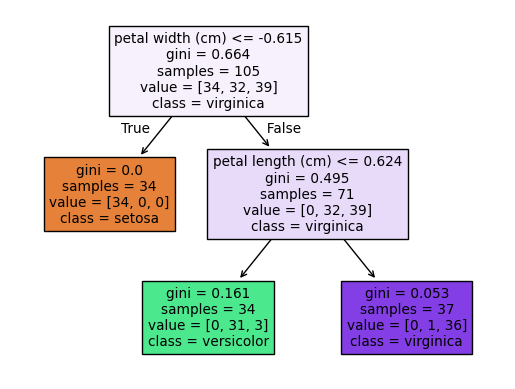

In [10]:
# visualizing using sklearn built-in tools
text_representation = tree.export_text(clf)
print(text_representation)
tree.plot_tree(clf, feature_names=feature_names, class_names=list(labels), filled=True)

## Using Graphviz for visualization

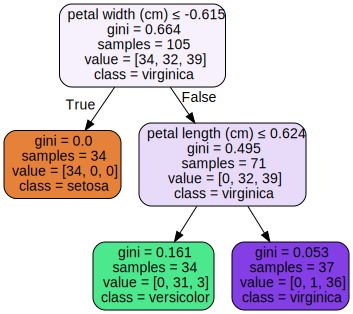

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                 feature_names=data.feature_names,
                                 class_names=data.target_names,
                                 filled=True, rounded=True,
                                 special_characters=True,
                                 fontname="Arial")
graph = graphviz.Source(dot_data)
# graph.render("data")  # Uncomment to save as a file
graph